In [101]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import pickle

In [102]:
visa_df = pickle.load( open( "clean_data.p", "rb" ) )
visa_df.head()

,add_these_pw_job_title_9089,application_type,case_no,class_of_admission,country_of_citizenship,country_of_citzenship,employer_country,employer_phone_ext,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,...,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089,have_agent,Certified
0,NaN,PERM,A-07323-97014,J-1,NaN,ARMENIA,NaN,NaN,NaN,NaN,...,NaN,NaN,IT,NaN,yr,NaN,NaN,NaN,False,True
1,NaN,PERM,A-07332-99439,B-2,NaN,POLAND,NaN,NaN,NaN,NaN,...,NaN,NaN,Other Economic Sector,NaN,yr,NaN,NaN,NaN,False,False
2,NaN,PERM,A-07333-99643,H-1B,NaN,INDIA,NaN,NaN,NaN,NaN,...,NaN,NaN,Aerospace,NaN,yr,NaN,NaN,NaN,False,True
3,NaN,PERM,A-07339-01930,B-2,NaN,SOUTH KOREA,NaN,NaN,NaN,NaN,...,NaN,NaN,Other Economic Sector,NaN,hr,NaN,NaN,NaN,False,True
4,NaN,PERM,A-07345-03565,L-1,NaN,CANADA,NaN,NaN,NaN,NaN,...,NaN,NaN,Advanced Mfg,NaN,yr,NaN,NaN,NaN,False,True


In [103]:
def isNat(nat):
    try:
        return np.datetime64(nat) == np.datetime64('NaT') 
    except:
        return False
    
def isNan(nan):
    try:
        return np.isnan(nan)
    except:
        return False
    
def transformType(dataframe, fields):
#     type_ = new_df.application_type.unique()
    final = []
    for f in fields:
        type_ = dataframe[f].unique()
        result = dict()
        index = 1
        for i in type_:
            if isNat(i) or isNan(i):
                result[i] = 0
            else:
                result[i] = index
                index+=1
        final.append(result)
    return final

def transformData(newType,dataframe,fields):
    new_df = pd.DataFrame()
    for i,f in enumerate(fields):
        new_df[f] = dataframe[f].apply(lambda d: 0 if isNat(d) or isNan(d) else newType[i][d])
    return new_df


In [104]:
newType = transformType(visa_df, visa_df.columns)
newData = transformData(newType,visa_df,visa_df.columns)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: In the future, 'NAT == x' and 'x == NAT' will always be False.
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
newData.head()

,add_these_pw_job_title_9089,application_type,case_no,class_of_admission,country_of_citizenship,country_of_citzenship,employer_country,employer_phone_ext,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,...,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089,have_agent,Certified
0,0,1,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
1,0,1,2,2,0,2,0,0,0,0,...,0,0,2,0,1,0,0,0,1,2
2,0,1,3,3,0,3,0,0,0,0,...,0,0,3,0,1,0,0,0,1,1
3,0,1,4,2,0,4,0,0,0,0,...,0,0,2,0,2,0,0,0,1,1
4,0,1,5,4,0,5,0,0,0,0,...,0,0,4,0,1,0,0,0,1,1


In [106]:
np.random.seed(42)
def random_data(df,train_n = 0.8):
    indexs =[i for i in range(df.shape[0])]
    np.random.shuffle(indexs)
    train = df.loc[indexs[:int(df.shape[0]*train_n)],:]
    test = df.loc[indexs[int(df.shape[0]*train_n):],:]
    train = train.reset_index()
    test  = test.reset_index()
    return train.drop(columns='index'),test.drop(columns='index')
train,test = random_data(newData)


In [107]:
train.shape,test.shape

((166065, 106), (41517, 106))

In [108]:
train.head()

,add_these_pw_job_title_9089,application_type,case_no,class_of_admission,country_of_citizenship,country_of_citzenship,employer_country,employer_phone_ext,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,...,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089,have_agent,Certified
0,0,0,0,3,40,0,1,0,0,0,...,0,1,0,0,6,0,0,0,2,1
1,0,0,0,9,33,0,1,0,0,0,...,0,1,0,31,6,0,0,0,1,2
2,0,0,0,9,31,0,1,0,0,0,...,0,1,0,0,6,0,0,0,1,1
3,0,0,0,3,2,0,1,0,0,0,...,0,1,0,0,6,0,0,0,2,1
4,0,0,0,3,8,0,1,0,0,0,...,0,1,0,0,6,0,0,0,2,1


## Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(train.drop(columns='Certified'),train.Certified)



GaussianNB(priors=None)

In [110]:
prediction = clf.predict([test.iloc[i,:-1] for i in range(test.shape[0])])

In [111]:
sum(prediction==test.Certified)/test.shape[0]

0.5939494664836091

## Goodness of model

In [112]:
def accuracy(TP,TN,FP,FN):
    return (TP+TN)/(TP+FP+FN+TN)
def precision(TP,FP):
    return TP/(TP+FP)
def recall(TP,FN):
    return TP/(TP+FN)
def f1Score(Recall,Precision):
    return 2*(Recall*Precision)/(Recall+Precision)
# TP = certified and prediction = certified
# TN = certified and prediction = deny
# FP = Deny and prediction = certified
# FN = Deny and prediction = deny

In [113]:
test.Certified.head()

0    1
1    1
2    1
3    2
4    1
Name: Certified, dtype: int64

In [114]:
TP = sum((test.Certified == 1)&(prediction==1))# Certfied and Certified
FN = sum((test.Certified == 1)&(prediction!=1))# Certfied and deny
FP = sum((test.Certified != 1)&(prediction==1))# deny and Certified
TN = sum((test.Certified != 1)&(prediction!=1))# deny and deny
print("accuracy",accuracy(TP,TN,FP,FN))
print("precision",precision(TP,FP))
print("recall",recall(TP,FN))
print("f1Score",f1Score(recall(TP,FN),precision(TP,FP)))

accuracy 0.5939494664836091
precision 0.9428080954101915
recall 0.5723767209697768
f1Score 0.7123110003754395


## Logistic Regression

In [134]:
from sklearn import linear_model

regr = linear_model.LogisticRegression()
regr.fit(train.drop(columns='Certified'),train.Certified)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
prediction = regr.predict([test.iloc[i,:-1] for i in range(test.shape[0])])

In [122]:
sum(prediction==test.Certified)/test.shape[0]

0.8847219211407376

## Goodness of model

In [123]:
TP = sum((test.Certified == 1)&(prediction==1))# Certfied and Certified
FN = sum((test.Certified == 1)&(prediction!=1))# Certfied and deny
FP = sum((test.Certified != 1)&(prediction==1))# deny and Certified
TN = sum((test.Certified != 1)&(prediction!=1))# deny and deny
print("accuracy",accuracy(TP,TN,FP,FN))
print("precision",precision(TP,FP))
print("recall",recall(TP,FN))
print("f1Score",f1Score(recall(TP,FN),precision(TP,FP)))

accuracy 0.8847219211407376
precision 0.88809115412889
recall 0.993993746914596
f1Score 0.9380629464747903


## KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) # plot graph accuracy
neigh.fit(train.drop(columns='Certified'),train.Certified)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [131]:
prediction = neigh.predict([test.iloc[i,:-1] for i in range(test.shape[0])])

In [132]:
sum(prediction==test.Certified)/test.shape[0]

0.9337861598863116

## Goodness of model

In [133]:
TP = sum((test.Certified == 1)&(prediction==1))# Certfied and Certified
FN = sum((test.Certified == 1)&(prediction!=1))# Certfied and deny
FP = sum((test.Certified != 1)&(prediction==1))# deny and Certified
TN = sum((test.Certified != 1)&(prediction!=1))# deny and deny
print("accuracy",accuracy(TP,TN,FP,FN))
print("precision",precision(TP,FP))
print("recall",recall(TP,FN))
print("f1Score",f1Score(recall(TP,FN),precision(TP,FP)))

accuracy 0.9337861598863116
precision 0.9501188282731181
recall 0.9758378585925073
f1Score 0.9628066187712248


In [90]:
f1Scores = []
neighbors = range(1,5)
for n in neighbors:
    neigh = KNeighborsClassifier(n_neighbors=n) # plot graph accuracy
    neigh.fit(train.drop(columns='Certified'),train.Certified)
    predition = neigh.predict([test.iloc[i,:-1] for i in range(test.shape[0])])
    TP = sum((test.Certified == 1)&(predition==1))# Certfied and Certified
    TN = sum((test.Certified == 1)&(predition!=1))# Certfied and deny
    FP = sum((test.Certified != 1)&(predition==1))# deny and Certified
    FN = sum((test.Certified != 1)&(predition!=1))# deny and deny
    f1Scores.append(f1Score(recall(TP,FN),precision(TP,FP)))

In [91]:
f1Scores

[0.9323700581978727,
 0.9344978165938865,
 0.9336762139680124,
 0.9344808367788681]

<Container object of 4 artists>

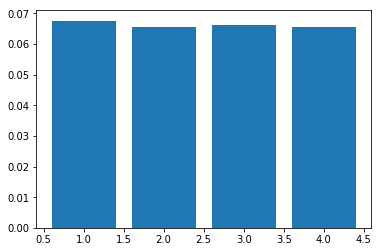

In [100]:
plt.bar(neighbors,1-np.array(f1Scores))